<a href="https://colab.research.google.com/github/Rashi0903/Lung-Cancer-Detection/blob/main/Lung_Cancer(MobileNet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage

# Generate predictions and true labels
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Found 2102 images belonging to 2 classes.
Found 539 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 429s 6s/step - accuracy: 0.7731 - loss: 0.4453 - val_accuracy: 0.9316 - val_loss: 0.2011
Epoch 2/10
 1/65 ━━━━━━━━━━━━━━━━━━━━ 1:16 1s/step - accuracy: 0.8750 - loss: 0.2410

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.8750 - loss: 0.2410 - val_accuracy: 0.9630 - val_loss: 0.1528
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9104 - loss: 0.2307 - val_accuracy: 0.8867 - val_loss: 0.2203
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7812 - loss: 0.4214 - val_accuracy: 0.9259 - val_loss: 0.2639
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9064 - loss: 0.2188 - val_accuracy: 0.9004 - val_loss: 0.2056
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9688 - loss: 0.1706 - val_accuracy: 0.8889 - val_loss: 0.3036
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9318 - loss: 0.1878 - val_accuracy: 0.8730 - val_loss: 0.2275
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9688 - loss: 0.1531 - val_accuracy: 0.9259 - val_loss: 0.2132
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9203 - loss: 0.1930 - val_accuracy: 0.9336 - val_loss: 0

NameError: name 'confusion_matrix' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
import numpy as np

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing with reduced augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=10,  # Reduced rotation range
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    shear_range=0.1,  # Reduced shear
    zoom_range=0.1,  # Reduced zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Load and preprocess the images from directories with smaller batch size and image size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='binary'
)

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of the base model to reduce computation
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to reduce unnecessary training
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with fewer epochs
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10,  # Reduced number of epochs
    callbacks=[early_stopping]  # Add early stopping
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage



Found 2102 images belonging to 2 classes.
Found 539 images belonging to 2 classes.
Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 62s 410ms/step - accuracy: 0.6282 - loss: 0.6488 - val_accuracy: 0.7614 - val_loss: 0.4955
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7500 - loss: 0.5050 - val_accuracy: 0.9091 - val_loss: 0.3662
Epoch 3/10
 75/131 ━━━━━━━━━━━━━━━━━━━━ 28s 511ms/step - accuracy: 0.7372 - loss: 0.5102

KeyboardInterrupt: 

Found 2102 images belonging to 2 classes.
Found 539 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 65s 443ms/step - accuracy: 0.5947 - loss: 0.7438 - val_accuracy: 0.7595 - val_loss: 0.4935
Epoch 2/10
  1/131 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - accuracy: 0.6875 - loss: 0.7738

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6875 - loss: 0.7738 - val_accuracy: 0.7273 - val_loss: 0.6602
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 75s 401ms/step - accuracy: 0.7714 - loss: 0.4868 - val_accuracy: 0.8087 - val_loss: 0.4144
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 1.0000 - loss: 0.2366 - val_accuracy: 0.7273 - val_loss: 0.5531
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 55s 405ms/step - accuracy: 0.8267 - loss: 0.4074 - val_accuracy: 0.8371 - val_loss: 0.3668
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.3978 - val_accuracy: 0.7273 - val_loss: 0.4912
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 81s 393ms/step - accuracy: 0.8384 - loss: 0.3863 - val_accuracy: 0.8523 - val_loss: 0.3327
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.2430 - val_accuracy: 0.7273 - val_loss: 0.4553
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 84s 412ms/step - accuracy: 0.8655 - loss: 0.3435 - val_accuracy: 

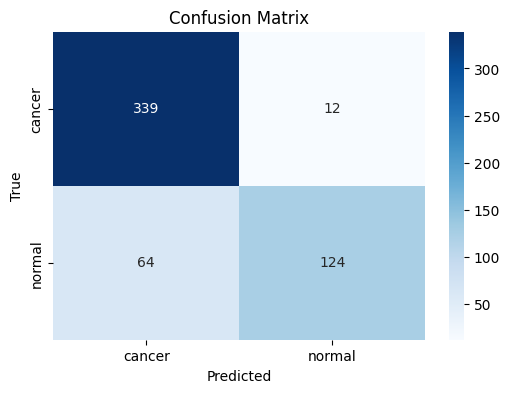

Accuracy: 85.90%
F1 Score: 0.77
Precision: 0.91
Recall: 0.66


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing with reduced augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=10,  # Reduced rotation range
    width_shift_range=0.1,  # Reduced width shift
    height_shift_range=0.1,  # Reduced height shift
    shear_range=0.1,  # Reduced shear
    zoom_range=0.1,  # Reduced zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Load and preprocess the images from directories with smaller batch size and image size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Reduced image size
    batch_size=16,  # Reduced batch size
    class_mode='binary',
    shuffle=False  # Do not shuffle for accurate confusion matrix
)

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers of the base model to reduce computation
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping to reduce unnecessary training
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model with fewer epochs
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10,  # Reduced number of epochs
    callbacks=[early_stopping]  # Add early stopping
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage

# Function to calculate and print confusion matrix and other metrics
def evaluate_model_performance(model, test_generator):
    # Get true labels and predictions
    true_labels = test_generator.classes
    predictions = model.predict(test_generator)
    predicted_labels = (predictions > 0.5).astype(int).reshape(-1)

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate accuracy, F1 score, precision, and recall
    acc = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)

    print(f'Accuracy: {acc * 100:.2f}%')
    print(f'F1 Score: {f1:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')

# Evaluate the model's performance
evaluate_model_performance(model, test_generator)


Found 2102 images belonging to 2 classes.
Found 539 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8115 - loss: 0.4159 - val_accuracy: 0.9375 - val_loss: 0.1904
Epoch 2/10
 1/65 ━━━━━━━━━━━━━━━━━━━━ 1:14 1s/step - accuracy: 0.8750 - loss: 0.2744

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8750 - loss: 0.2744 - val_accuracy: 0.9259 - val_loss: 0.2748
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.8918 - loss: 0.2525 - val_accuracy: 0.9395 - val_loss: 0.1693
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9062 - loss: 0.2617 - val_accuracy: 1.0000 - val_loss: 0.2280
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9268 - loss: 0.1889 - val_accuracy: 0.8613 - val_loss: 0.2192
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9375 - loss: 0.1878 - val_accuracy: 0.7407 - val_loss: 0.5045
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9245 - loss: 0.1836 - val_accuracy: 0.9434 - val_loss: 0.1469
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9688 - loss: 0.1699 - val_accuracy: 0.9259 - val_loss: 0.2192
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.9311 - loss: 0.1642 - val_accuracy: 0.9199 - val_loss: 0.

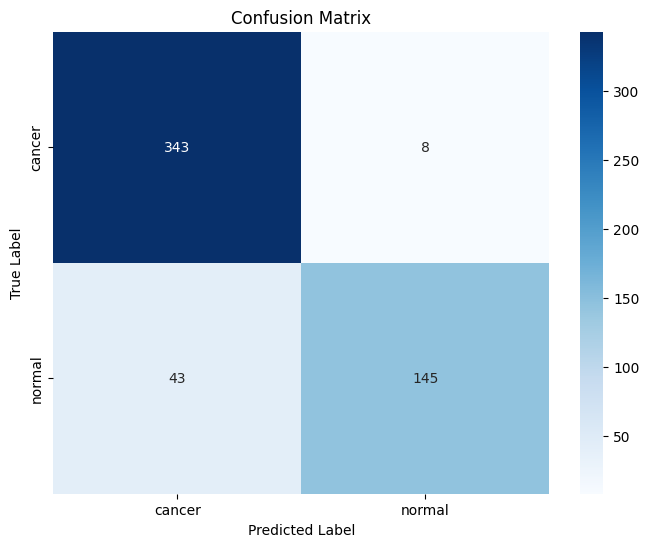

Classification Report:
              precision    recall  f1-score   support

      cancer       0.89      0.98      0.93       351
      normal       0.95      0.77      0.85       188

    accuracy                           0.91       539
   macro avg       0.92      0.87      0.89       539
weighted avg       0.91      0.91      0.90       539



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for confusion matrix
)

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage

# Predict the classes of the test set
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 2102 images belonging to 2 classes.
Found 539 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8152 - loss: 0.3959 - val_accuracy: 0.9473 - val_loss: 0.1841
Epoch 2/10
 1/65 ━━━━━━━━━━━━━━━━━━━━ 1:13 1s/step - accuracy: 0.9688 - loss: 0.0999

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9688 - loss: 0.0999 - val_accuracy: 1.0000 - val_loss: 0.2261
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9066 - loss: 0.2289 - val_accuracy: 0.9199 - val_loss: 0.1825
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9062 - loss: 0.1588 - val_accuracy: 0.9259 - val_loss: 0.2873
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9189 - loss: 0.2051 - val_accuracy: 0.9531 - val_loss: 0.1605
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8750 - loss: 0.3504 - val_accuracy: 1.0000 - val_loss: 0.1011
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9240 - loss: 0.1811 - val_accuracy: 0.9219 - val_loss: 0.1733
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9688 - loss: 0.1190 - val_accuracy: 0.8889 - val_loss: 0.3979
Epoch 9/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9213 - loss: 0.1736 - val_accuracy: 0.9102 - val_loss: 0.

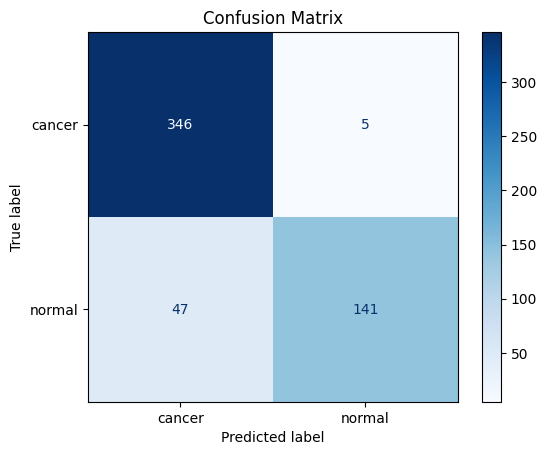

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for getting the correct labels during evaluation
)

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage

# Generate predictions and true labels
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score
import numpy as np
import matplotlib.pyplot as plt

# Set the paths for training and testing data
train_dir = '/content/drive/MyDrive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Image data generator for training and testing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Load and preprocess the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for getting the correct labels during evaluation
)

# Load the MobileNetV2 model, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Use 'softmax' for multi-class classification

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')  # Print the final accuracy in percentage

# Generate predictions and true labels
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute precision, recall, and F1-score
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
